<a href="https://colab.research.google.com/github/vaibhavi123344/Facial-Emotion-Recognition-Using-CNN-/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Datasets/CK+48

anger  fear  happy  sadness  surprise


In [ ]:
!pip install scikeras

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf # Import TensorFlow
import keras
# Instead of using keras.utils.np_utils, use tensorflow.keras.utils.to_categorical directly
from tensorflow.keras.utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
# Import convolutional layers from tensorflow.keras.layers instead
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
# Import BatchNormalization from tensorflow.keras.layers
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("/content/drive/MyDrive/Datasets/CK+48"))


# Any results you write to the current directory are saved as output
# Use scikeras.wrappers instead of keras.wrappers.scikit_learn
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

['happy', 'fear', 'sadness', 'surprise', 'anger']


In [ ]:
data_path = '/content/drive/MyDrive/Datasets/CK+48'
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-happy

Loaded the images of dataset-fear

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise

Loaded the images of dataset-anger



(760, 48, 48, 3)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [ ]:
# Instead of using np_utils, use tensorflow.keras.utils.to_categorical directly
from tensorflow.keras.utils import to_categorical

Y = to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [ ]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')

    return model

In [ ]:
model_custom = create_model()
model_custom.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,983 (851.50 KB)

 Trainable params: 217,983 (851.50 KB)

 Non-trainable params: 0 (0.00 B)

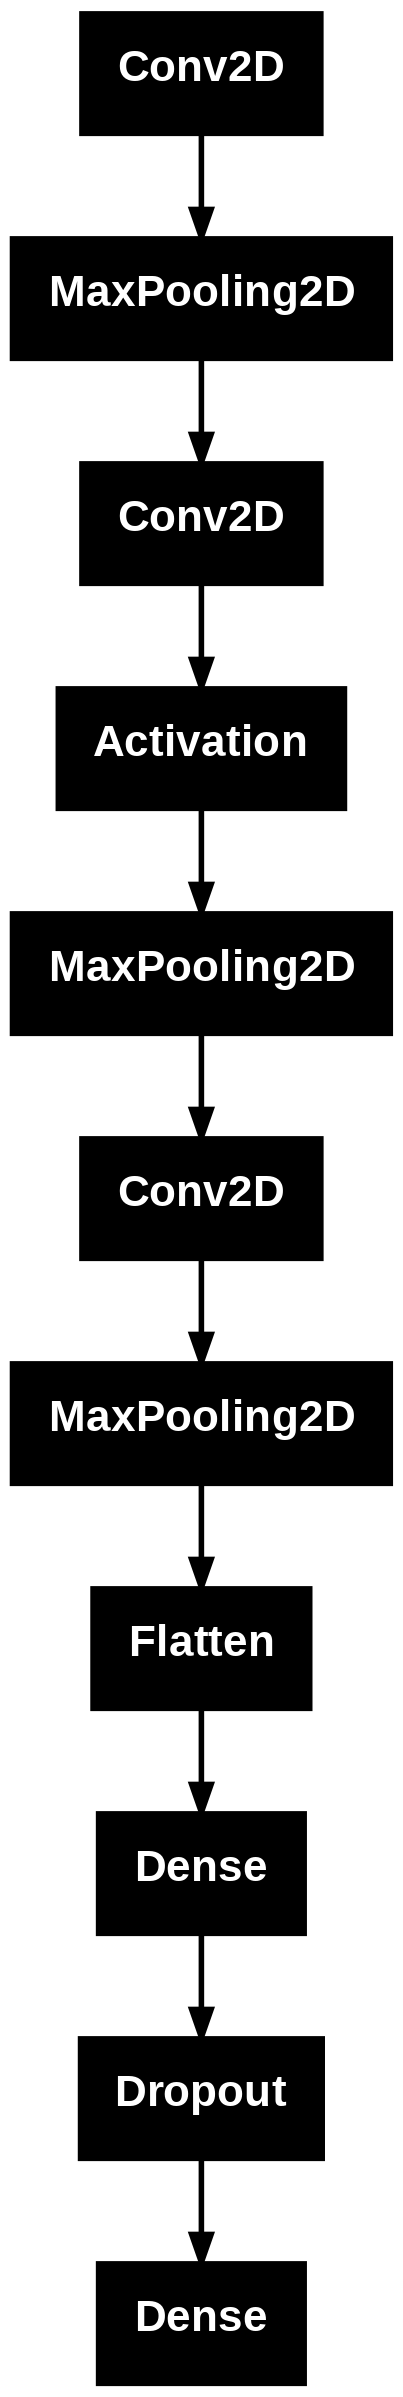

In [ ]:
from keras.utils import plot_model
plot_model(model_custom, to_file='model.png')

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=False)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
BS = 8
EPOCHS = 200

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

result = []
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(x):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    # Change the file extension to .keras
    file_path = "/kaggle/working/weights_best_"+str(k_no)+".keras"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = create_model()

    # The following lines were incorrectly indented outside the loop
    hist = model.fit(aug.flow(X_Train_, Y_Train, batch_size=BS), # Pass the ImageDataGenerator flow directly to fit
                        epochs=EPOCHS,
                        validation_data=(X_Test_, Y_Test),
                        callbacks=callbacks_list,
                        verbose=0)
    model.load_weights(file_path)  # Now correctly indented inside the loop
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
print(scores_acc,scores_loss)

[0.8157894611358643, 0.7105262875556946, 0.6315789222717285, 0.6513158082962036, 0.6710526347160339] [0.6179466247558594, 0.9058346152305603, 0.923245906829834, 0.9164377450942993, 0.8002851009368896]


In [ ]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

0


In [ ]:
file_path = "/kaggle/working/weights_best_"+str(k_no)+".keras"

In [ ]:
# Change the file extension to .keras when loading the weights as well
model.load_weights("/kaggle/working/weights_best_"+str(value_index)+".keras")

In [ ]:
best_model = model

In [ ]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(best_model.predict(test_image))
print(np.argmax(best_model.predict(test_image), axis=-1))
print(y_test[0:1])

#predict
y_pred = best_model.predict(X_test)

Test Loss: 0.6150120496749878
Test accuracy: 0.8026315569877625
(1, 48, 48, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[7.1357018e-01 2.7102274e-01 1.3482789e-02 1.1521518e-04 7.1332348e-04
  9.4866747e-04 1.4716528e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0]
[[1. 0. 0. 0. 0. 0. 0.]]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<Figure size 2000x1000 with 0 Axes>

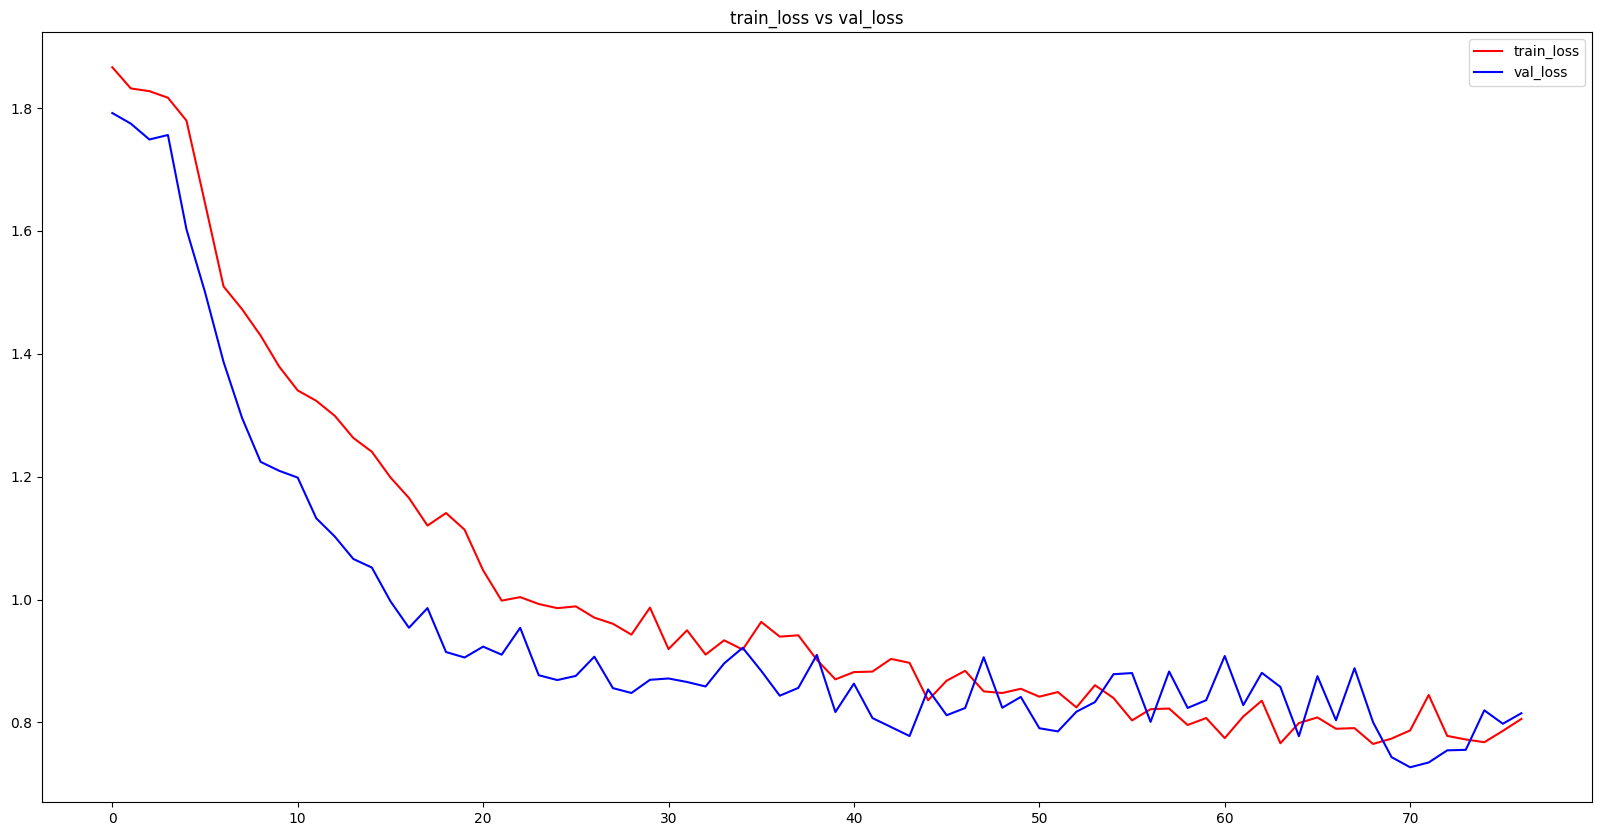

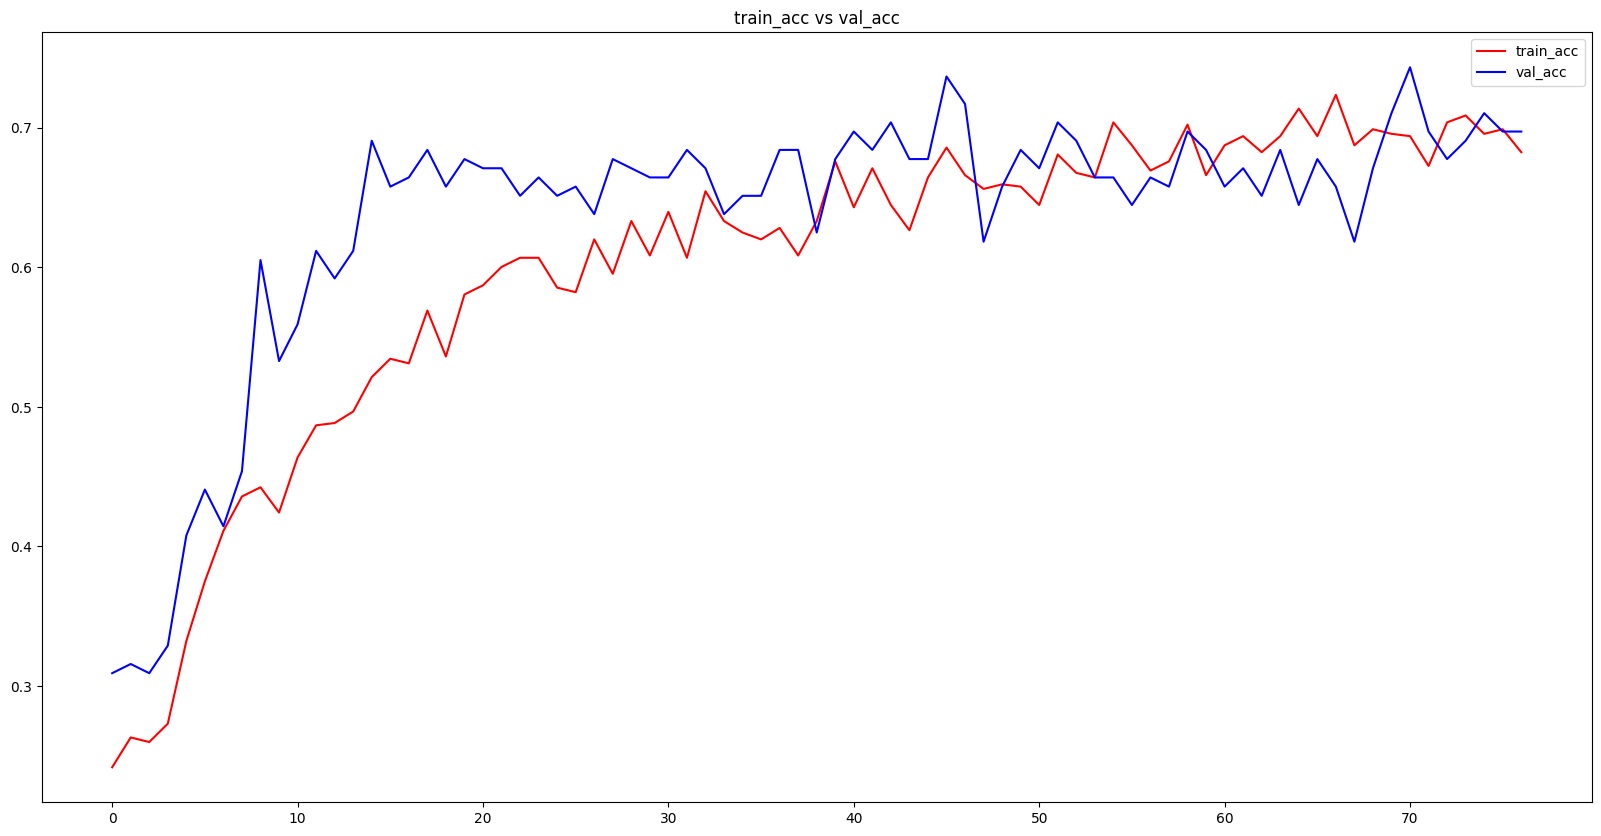

<Figure size 2000x1000 with 0 Axes>

In [ ]:
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [ ]:
best_model.save_weights('model_weights.weights.h5') # Change the filename to include .weights.h5 extension
best_model.save('model_keras.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Replace predict_classes with predict and argmax
y_pred = best_model.predict(X_test)
results = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.where(y_test == 1)[1], results)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )
final_cm = cm_df
final_cm

,anger,contempt,disgust,fear,happy,sadness,surprise
anger,32,0,0,0,0,0,0
contempt,0,7,0,0,0,0,0
disgust,4,0,28,0,0,0,0
fear,0,0,0,10,4,0,0
happy,0,0,3,3,37,2,0
sadness,0,0,4,0,0,7,0
surprise,0,0,10,0,0,0,1


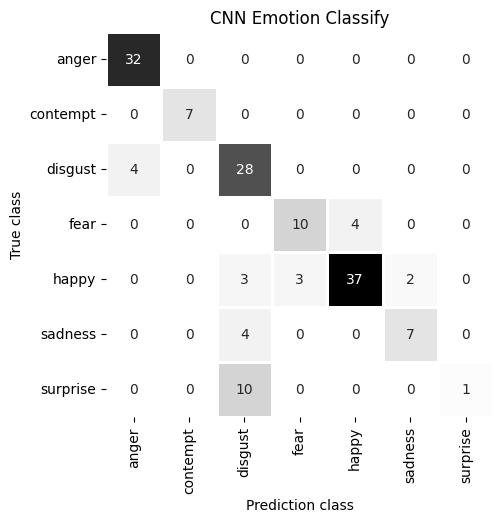

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

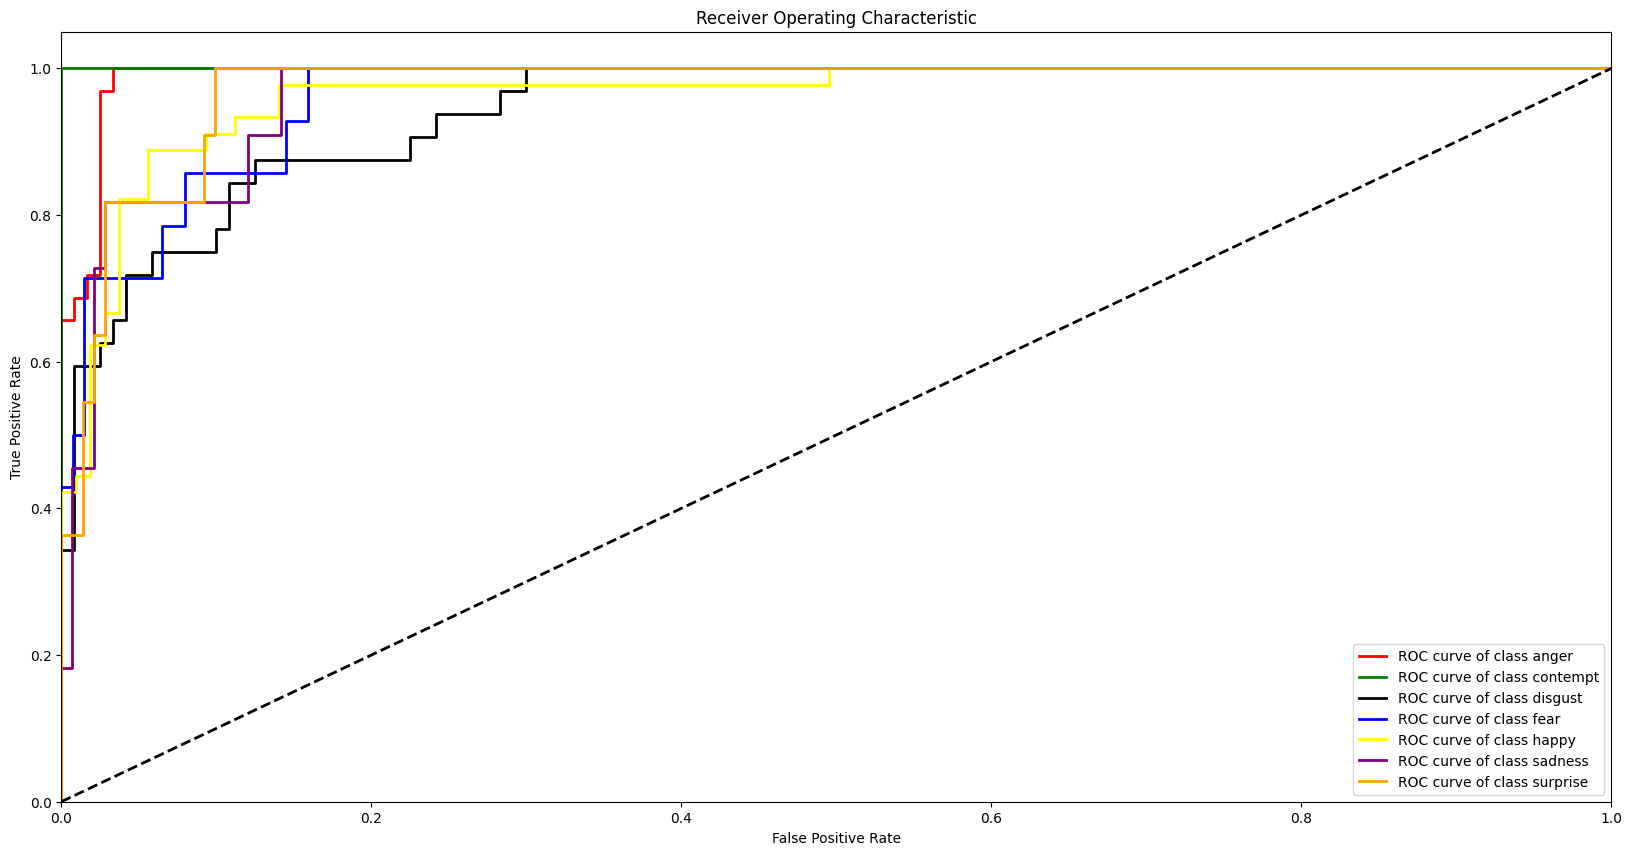

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle
new_label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
final_label = new_label
new_class = 7
#ravel flatten the array into single vector
y_pred_ravel = y_pred.ravel()
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()